In [162]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [136]:
#importing the weather dataframe
path = r'C:\Users\karim\Documents\machine learning'
df_weather = pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [138]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [140]:
#Reduce the weather dataset to a single year
reduced_df = df_weather[df_weather['DATE'].astype(str).str.contains('199')]
reduced_df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,1,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,...,3,0.82,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4
10959,19900102,1,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,...,5,0.79,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9
10960,19900103,1,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,...,4,0.90,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7
10961,19900104,1,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,...,6,0.93,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0
10962,19900105,1,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,...,4,0.91,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,7,2.1,0.74,0.9953,0.28,1.93,0,1.0,...,7,0.75,0.9954,0.15,0.41,0,0.1,4.8,3.0,7.5
14606,19991228,12,8,2.1,0.88,0.9956,0.13,1.22,0,0.0,...,3,0.73,1.0102,0.41,0.03,0,5.1,5.3,2.5,8.1
14607,19991229,12,8,2.1,0.84,1.0162,0.21,0.11,1,0.1,...,5,0.81,1.0229,0.35,0.85,0,3.9,7.1,4.2,9.1
14608,19991230,12,7,2.1,0.80,1.0276,0.26,0.01,0,0.5,...,8,0.94,1.0171,0.14,0.27,0,0.0,8.4,5.5,11.2


In [142]:
#scaling the dataset numeric columns
scaler = StandardScaler()
scaled_array = scaler.fit_transform(reduced_df)
scaled_reduced = pd.DataFrame(scaled_array, columns=reduced_df.columns)

In [144]:
scaled_reduced

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.586441,-1.601710,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,...,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425
1,-1.586406,-1.601710,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,...,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265
2,-1.586371,-1.601710,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,...,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609
3,-1.586336,-1.601710,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,...,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114
4,-1.586301,-1.601710,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,...,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,1.586347,1.588052,0.643233,-0.12338,-0.113596,-2.886734,-1.096265,3.053937,-0.159903,-0.826479,...,0.578501,-0.975527,-1.582028,-1.106753,-0.019645,-0.028673,-0.868123,-1.709659,-1.342032,-1.626232
3648,1.586382,1.588052,1.063914,-0.12338,1.225877,-2.849304,-1.261720,1.774682,-0.159903,-1.059123,...,-1.680451,-1.232793,-0.350221,-0.797251,-0.568744,-0.028673,0.491484,-1.573388,-1.467934,-1.471240
3649,1.586417,1.588052,1.063914,-0.12338,0.843171,-0.279112,-1.173478,-0.225280,0.403771,-1.035859,...,-0.550975,-0.203728,0.706803,-0.868674,0.616153,-0.028673,0.165178,-1.082814,-1.039868,-1.212921
3650,1.586452,1.588052,0.643233,-0.12338,0.460464,1.143227,-1.118326,-0.405457,-0.159903,-0.942801,...,1.143238,1.468504,0.224067,-1.118657,-0.221945,-0.028673,-0.895315,-0.728510,-0.712524,-0.670450


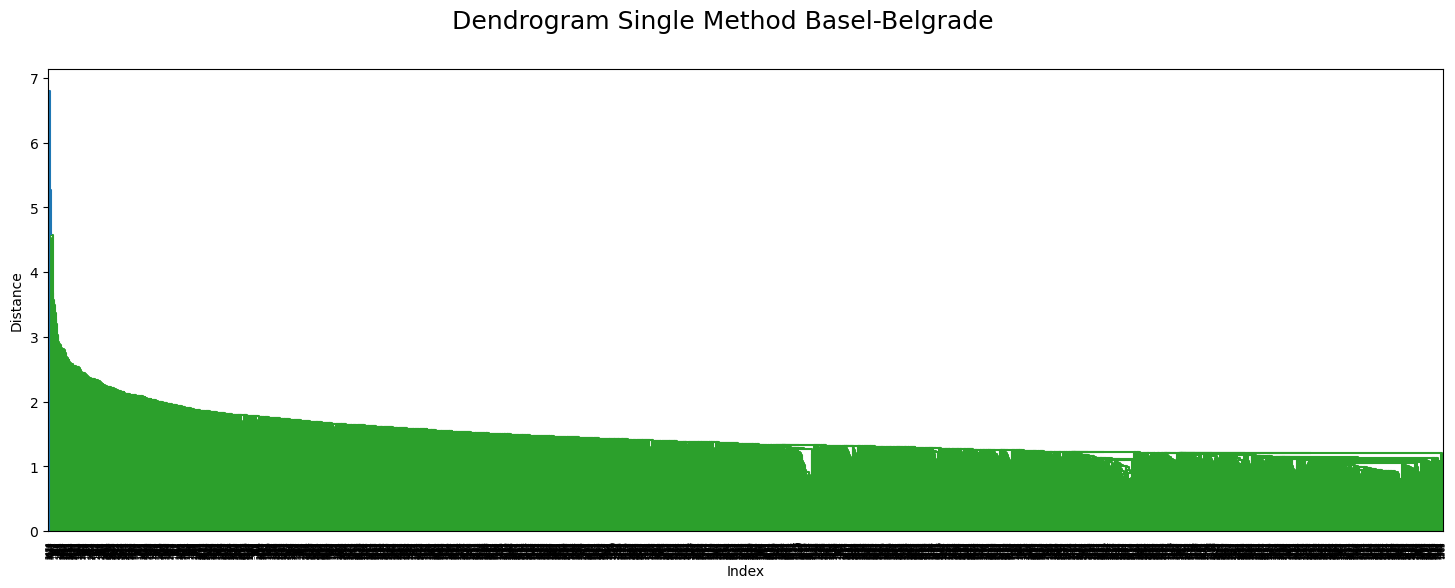

In [148]:
#Dendrogram simgle method
distance_single = linkage(scaled_reduced.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 ]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method Basel-Belgrade",fontsize=18)
plt.show()


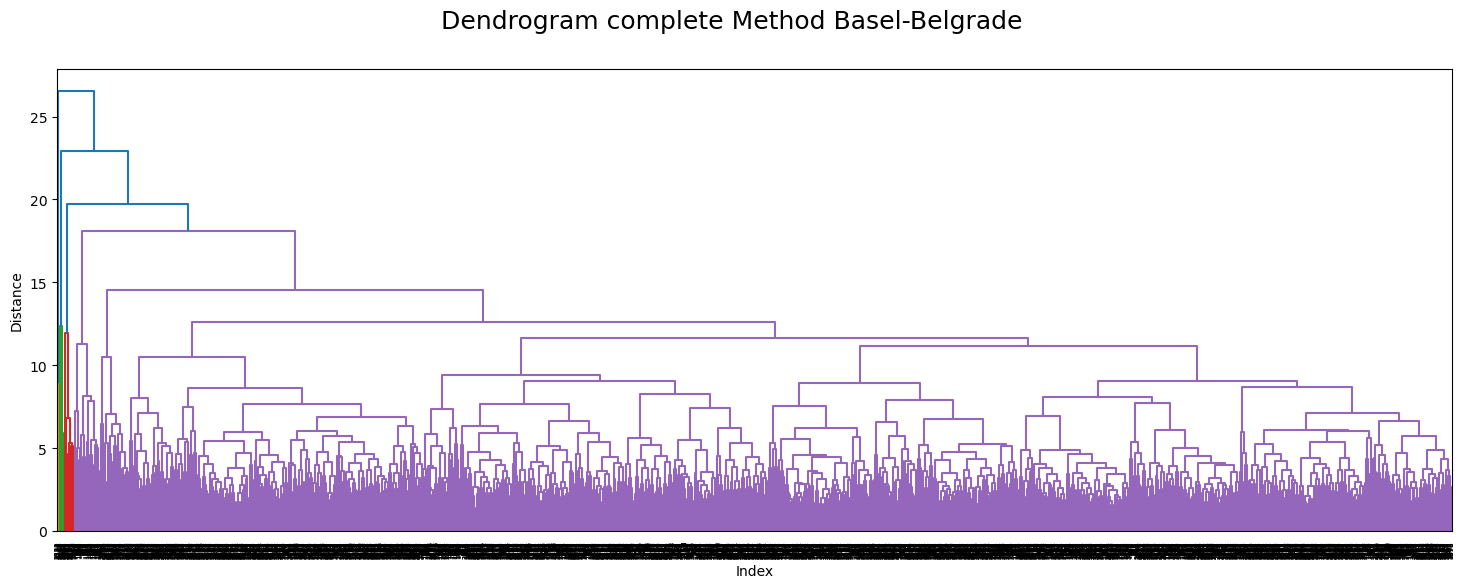

In [153]:
#dendrogram complete method
distance_complete = linkage(scaled_reduced.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 ]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram complete Method Basel-Belgrade",fontsize=18)
plt.show()

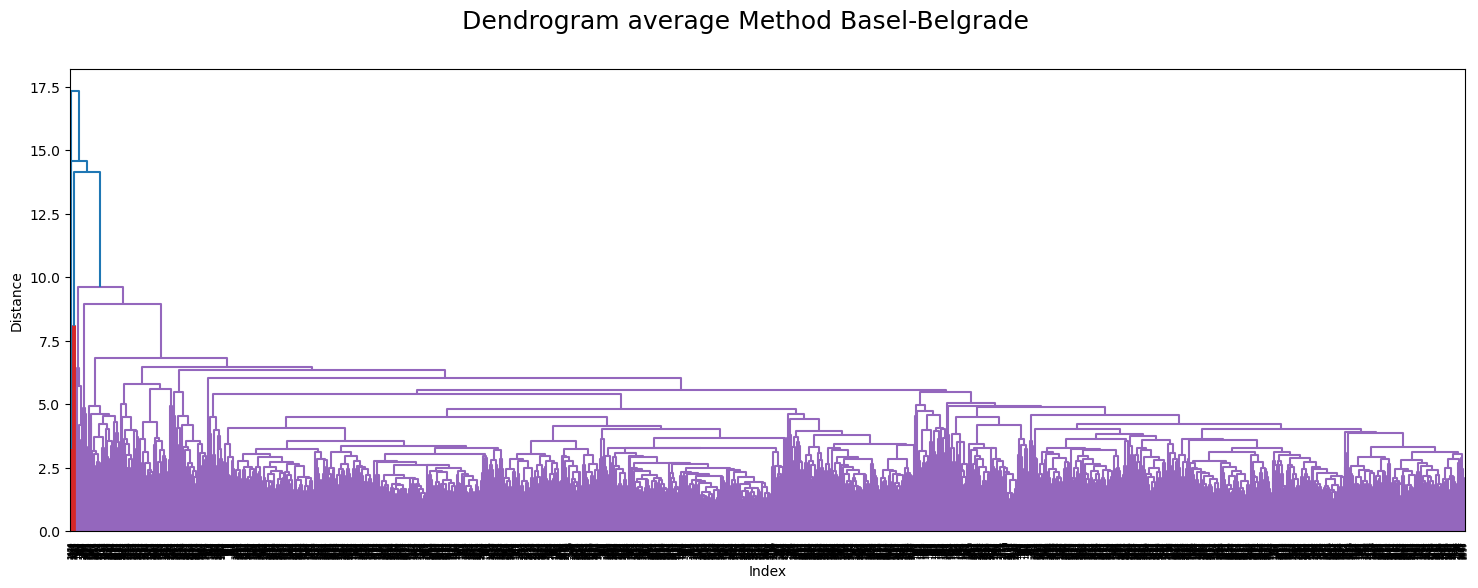

In [156]:
#Dendrogram average Method
distance_average = linkage(scaled_reduced.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 ]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram average Method Basel-Belgrade",fontsize=18)
plt.show()


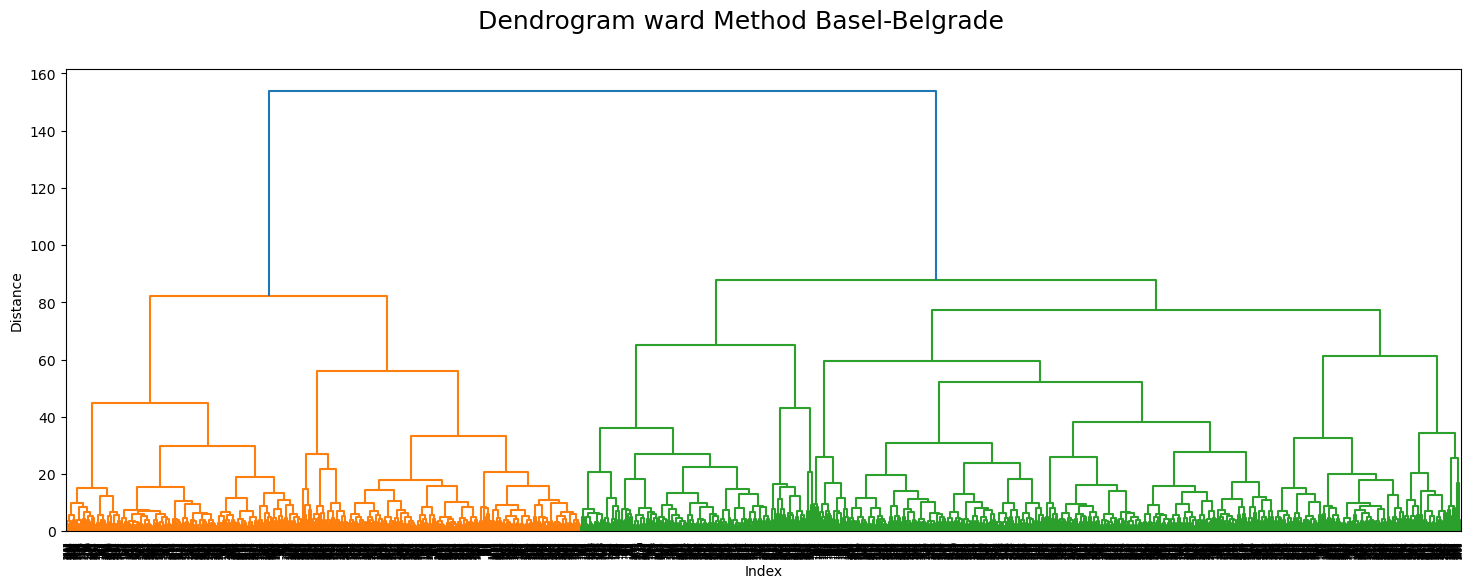

In [158]:
#Dendrogram ward Method
distance_ward = linkage(scaled_reduced.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 ]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram ward Method Basel-Belgrade",fontsize=18)
plt.show()


In [166]:
#Run the PCA model, reducing to two components
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(scaled_reduced)

In [170]:
#Make a dataframe of the new components
PCA_df = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12'])
PCA_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,-11.782677,2.399306,2.319071,-0.608512,2.429393,-3.130206,0.210910,-2.655356,1.368434,-1.876183,-1.487553,0.214804
1,-11.992257,2.310076,1.820988,0.249544,2.128963,-1.967802,0.598078,-1.901219,1.019561,-3.017069,-1.941582,0.370212
2,-12.161448,1.712818,1.677493,0.303571,1.594922,-1.356327,-0.923173,-1.645657,0.083215,-1.561668,-0.425172,0.817096
3,-11.226526,4.744294,3.060898,-1.300980,-0.085463,-0.062777,0.235898,0.301651,0.428341,-1.814844,-0.655593,0.597563
4,-10.966528,3.047329,4.736358,0.909735,-0.340148,-1.570262,-1.701501,0.835218,-1.351558,-0.533066,0.373928,1.113224
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,-9.621414,-9.318904,-5.417745,-2.673774,1.757290,-1.736616,2.915964,0.982797,2.778491,2.113837,-2.221552,-0.503655
3648,-10.774984,-8.791586,-7.809793,2.993585,1.506225,-2.018799,2.649618,0.478461,4.774728,1.589535,-2.009551,1.410551
3649,-11.503402,-1.577176,-2.963164,1.351083,1.358439,-1.678433,0.693803,-0.105062,2.920372,5.992384,-3.842234,2.029799
3650,-11.683440,0.881710,2.679515,0.621247,-0.678140,-0.500612,2.253887,0.078723,-1.408059,-0.328821,2.592176,-1.864967


In [172]:
# exporting PCA dataframe
PCA_df.to_csv(os.path.join(path,'data','prepared Data', 'weather_PCA.csv'))